Kenneth Putra Abadi

## Research question/interests

Correlation between BMI and medical costs between smokers and non-smokers
Using a scatter plot to find visualize the correlation between Charges and BMI between smokers and non-smokers.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
med = pd.read_csv("../data/raw/medical_expense.csv")

Correlation Coefficient of Smoker's BMI vs Charges =  0.8064806070155401


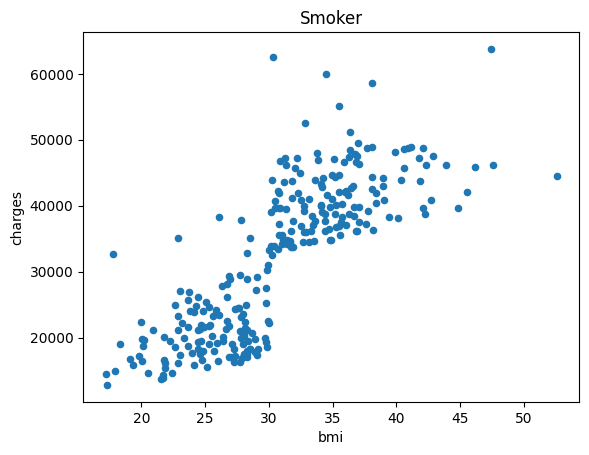

In [25]:
smoke = med[med["smoker"] == "yes"]
smoke = smoke[["bmi","charges"]]
smoke.plot(kind='scatter',x = 'bmi', y = 'charges',title= "Smoker")
coeffsmoke = smoke['bmi'].corr(smoke['charges'])
print("Correlation Coefficient of Smoker's BMI vs Charges = ", coeffsmoke)

Correlation Coefficient of non-Smoker's BMI vs Charges =  0.0840365431283327


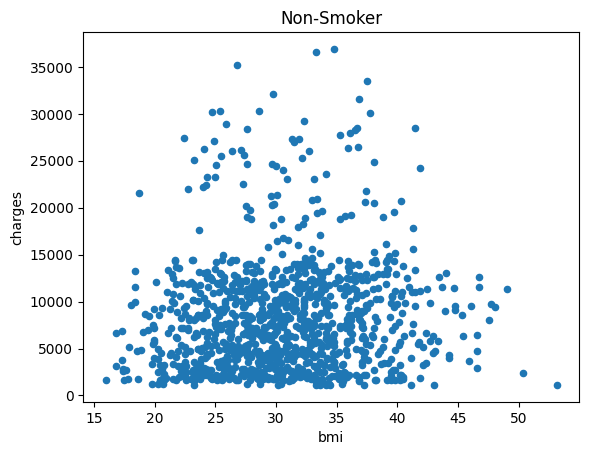

In [26]:
nosmoke = med[med["smoker"] == "no"]
nosmoke = nosmoke[["bmi","charges"]]
nosmoke.plot(kind='scatter',x = 'bmi', y = 'charges',title= "Non-Smoker")
coeffnosmoke = nosmoke['bmi'].corr(nosmoke['charges'])
print("Correlation Coefficient of non-Smoker's BMI vs Charges = ", coeffnosmoke)